<div class="alert alert-block alert-info" style="text-align: center;">
    <h1>Technical University Of Denmark </h1>
    <h1>42577 Introduction to Business Analytics </h1>
    <h1>Project - Fall 2023</h1>
    <!-- Add a break for spacing and use the strong tag for bold -->
    <br>
    Students:
    <br>
    <strong>Marios Dimitrios Lianos - s233558</strong>
    <br>
    <strong>Asimina Athanasiadi - s222771</strong>
    <br>
    <strong>Nikolaos Karageorgos - s222654</strong>
    <br>
    <strong>Charalampos Spiliopoulos - s222498</strong>
    
</div>

## Necessary Libraries & Dataset importing

In [1]:
import pandas as pd
import numpy as np
import folium
import os
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv("Trips_2018.csv")

# 1. Data Analysis & Visualizations



We're inspecting the dataset for any null values and plan to remove any incomplete records to ensure data quality. It can be seen below in the dataframe that there are many observations that have NaN values in the columns of start_station_id and end_station_id. 

In [3]:
df[df.isnull().any(axis=1)] 

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
10413518,10413518,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,40.857,-73.890,NaN,40.857,-73.890,34426,Subscriber,1971,2
10413697,10413697,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,40.857,-73.890,NaN,40.857,-73.887,34428,Subscriber,1976,2
10415434,10415434,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,40.857,-73.890,NaN,40.857,-73.890,34428,Subscriber,1976,2
10415668,10415668,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,40.845,-73.902,NaN,40.857,-73.890,34525,Subscriber,1988,1
10417031,10417031,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,40.857,-73.890,NaN,40.857,-73.890,34548,Subscriber,1986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390711,17390711,589,2018-12-24 14:22:12.3950,2018-12-24 14:32:01.6410,NaN,40.863,-73.899,NaN,40.860,-73.905,34463,Subscriber,1986,2
17393046,17393046,362,2018-12-24 15:34:09.8420,2018-12-24 15:40:12.1510,NaN,40.860,-73.905,NaN,40.863,-73.902,34463,Subscriber,1986,2
17393363,17393363,276,2018-12-24 15:44:26.6440,2018-12-24 15:49:03.3450,NaN,40.863,-73.902,NaN,40.860,-73.902,34463,Subscriber,1986,2
17423361,17423361,626,2018-12-26 15:08:40.3100,2018-12-26 15:19:06.8170,NaN,40.860,-73.905,NaN,40.845,-73.914,34463,Subscriber,1991,1


In [4]:
df = df.dropna(subset=['start_station_id'])

In [5]:
df.shape

(17545842, 14)

The 'Unnamed: 0' column is dropped from the dataset as it merely replicated the row indices, providing no additional valuable information for our analysis.

In [6]:
df = df.drop('Unnamed: 0', axis=1)

After the cleanup, we verify that there are no remaining null values that could potentially skew our data analysis. 

In [7]:
## Checking for null values left
df[df.isnull().any(axis=1)] 

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender


In [8]:
df.shape

(17545842, 13)

Some `start_station_ids` may appear for more than one location. 

In [9]:
# Group by 'start_station_id' and count the unique latitudes and longitudes
unique_location_counts = df.groupby('start_station_id').agg({
    'start_station_latitude': 'nunique',
    'start_station_longitude': 'nunique'
}).reset_index()


# Find station IDs with more than one unique latitude or longitude
stations_with_multiple_locations = unique_location_counts[
    (unique_location_counts['start_station_latitude'] > 1) | 
    (unique_location_counts['start_station_longitude'] > 1)
]

print(stations_with_multiple_locations)


     start_station_id  start_station_latitude  start_station_longitude
268             530.0                       2                        2


It appears that the difference is minimal and thus it will not affect the result of the clustering in any way.

In [10]:
location_counts = df.groupby(['start_station_id', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='count')

# Sort the results for better readability (optional)
location_counts_sorted = location_counts.sort_values(by=['start_station_id', 'count'], ascending=[True, False])

print(location_counts_sorted)

     start_station_id  start_station_latitude  start_station_longitude  count
0                72.0               40.767272               -73.993929  38405
1                79.0               40.719116               -74.006667  27198
2                82.0               40.711174               -74.000165  10217
3                83.0               40.683826               -73.976323  13134
4               119.0               40.696089               -73.978034   3241
..                ...                     ...                      ...    ...
814            3716.0               40.753599               -73.937956    107
815            3718.0               40.727464               -73.979504   2014
816            3719.0               40.683223               -73.973812    222
817            3720.0               40.684617               -73.987213     62
818            3721.0               40.767549               -73.920933    238

[819 rows x 4 columns]



### Descriptive Statistics:
* The data contains over 17.5 million trip duration records.
* The average (mean) trip duration is approximately 988 seconds (~16.5 minutes).
* The median trip duration is significantly less at 605 seconds (just over 10 minutes), indicating a skewed distribution with outliers affecting the mean.
* The standard deviation is very high, around 1.8x10<sup>4</sup> seconds, suggesting significant variation within the trip durations.
* The minimum trip duration is 60 seconds, and the maximum is an extreme outlier of over 1.5 million seconds.


In [11]:
df['tripduration'].describe()

count    1.754584e+07
mean     9.884746e+02
std      1.889591e+04
min      6.100000e+01
25%      3.580000e+02
50%      6.050000e+02
75%      1.060000e+03
max      1.951005e+07
Name: tripduration, dtype: float64

### Percentile Analysis:
* (0.1%, 0.01%, etc.) are computed to better understand the distribution and to identify extreme values.
* At the 99th percentile, the trip duration is around 3500 seconds, which seems realistic for a bike rental.
* There is a significant jump to the 99.9th and 99.99th percentiles, indicating the presence of extreme outliers.
* The data between the 0.1st and 99th percentiles represent the bulk of "normal" trip durations, ranging from 67 to 3500 seconds.

In [12]:
# Find min and 0.1, 0.5, 0.1 quantile of trip duration along with thenumber of points for each one of them
print(df['tripduration'].quantile([.1, .05, .02, .01, .001, .0001, .00001]))
# Find the 90,95,98,99 percentile of trip duration
print(df['tripduration'].quantile([.90,.95,.98,.99,.999,.9999,.99999]))

0.10000    226.0
0.05000    171.0
0.02000    124.0
0.01000    101.0
0.00100     67.0
0.00010     61.0
0.00001     61.0
Name: tripduration, dtype: float64
0.90000    1.656000e+03
0.95000    2.075000e+03
0.98000    2.660000e+03
0.99000    3.505000e+03
0.99900    1.580800e+04
0.99990    3.080817e+05
0.99999    2.261573e+06
Name: tripduration, dtype: float64


In [13]:
# Calculate the 0.1st and 999th percentiles
percentile_01 = df['tripduration'].quantile(0.001)
percentile_99 = df['tripduration'].quantile(0.999)
# i want to print the tripdurations of those who are in the 1st and 99th percentile
print('trip_durations :', percentile_01, percentile_99)

# Filter data based on percentiles
points_within_1_percentile = df[df['tripduration'] <= percentile_01]
points_within_99_percentile = df[df['tripduration'] >= percentile_99]

trip_durations : 67.0 15808.0


In [14]:
print(f"Number of points in the 1st percentile: {len(points_within_1_percentile)}")
print(f"Number of points in the 99th percentile: {len(points_within_99_percentile)}")

Number of points in the 1st percentile: 20565
Number of points in the 99th percentile: 17548


#### Data Filtering:
* For a realistic representation of the data and to make practical decisions based on the data we filtered out extreme outliers by setting thresholds at the 0.1st and 99th percentiles.
* After filtering, it is noted that only 0.2% of the data points are beyond these thresholds.


In [15]:
df = df[df['tripduration'] > percentile_01]
df = df[df['tripduration'] < percentile_99]

In [16]:
df.shape

(17507729, 13)

#### Data Transformation:
* The 'starttime' and 'stoptime' columns in the dataframe are converted from string types to datetime objects, allowing for easier manipulation of dates and times.
* The 'usertype' column is encoded from a string to an integer to prepare for machine learning, which generally requires numerical input.
* The 'start_station_id' and 'end_station_id' columns are cast from float to int.



In [17]:
df['starttime']=pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime']=pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")

# Encode the 'usertype' column from string to int
label_encoder = LabelEncoder()
df['usertype'] = label_encoder.fit_transform(df['usertype'])

# Transforming the 'start_station_id' and 'end_station_id' columns from float to int
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

A histogram is plotted to show the distribution of trip durations on a logarithmic scale. This is helpful because it appears that the distribution of trip durations is highly skewed with a long tail; most trips are short, but there are a few very long trips.

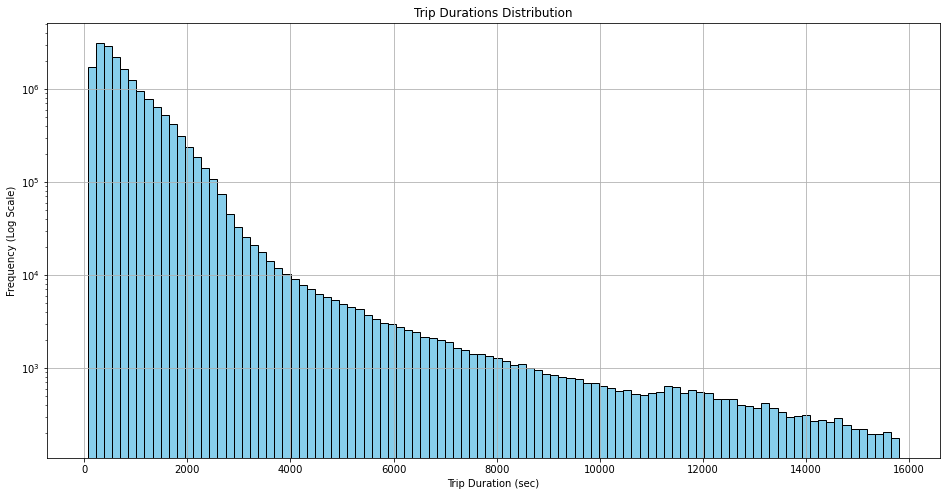

In [18]:
## Plot of the distribution of trip durations
trip_durations = df['tripduration']
plt.figure(figsize=(16, 8))
plt.hist(trip_durations, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Trip Durations Distribution')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

The user age histogram for the bike rental service peaks at the 30-40 age group, showing that most users are young to middle-aged adults. Usage drops among those over 60, and an improbable outlier over 120 years suggests a data entry error.

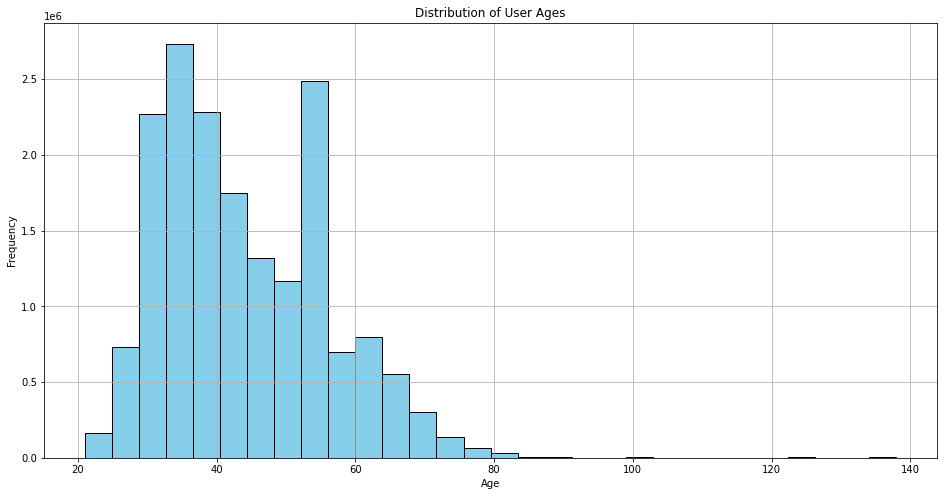

In [19]:
ages = 2023 - df['birth_year']

plt.figure(figsize=(16, 8))
plt.hist(ages, bins=30, color='skyblue', edgecolor='black') 
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()  



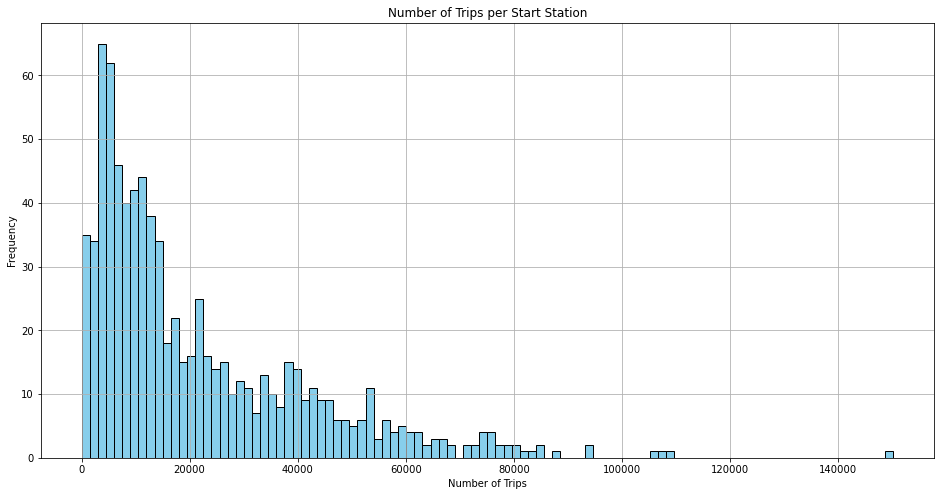

In [20]:
plt.figure(figsize=(16, 8))
start_station_trip_counts = df['start_station_id'].value_counts()
plt.hist(start_station_trip_counts, bins=100, color='skyblue', edgecolor='black')
plt.title('Number of Trips per Start Station')
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

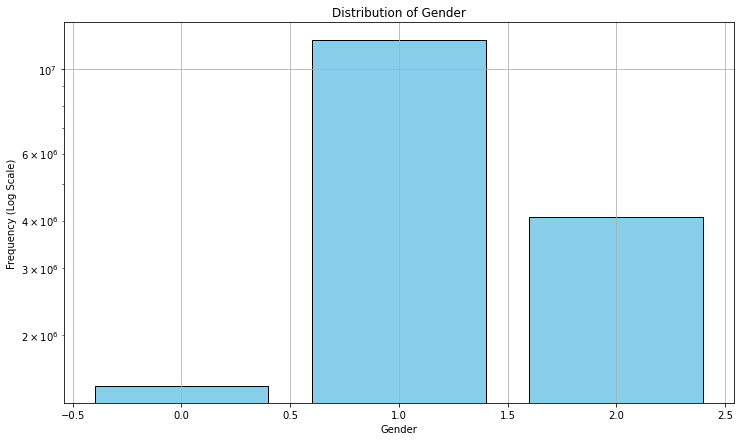

In [21]:
plt.figure(figsize=(12, 7))
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='skyblue', edgecolor='black')
plt.yscale('log')  # Log scale if there are orders of magnitude difference between genders
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

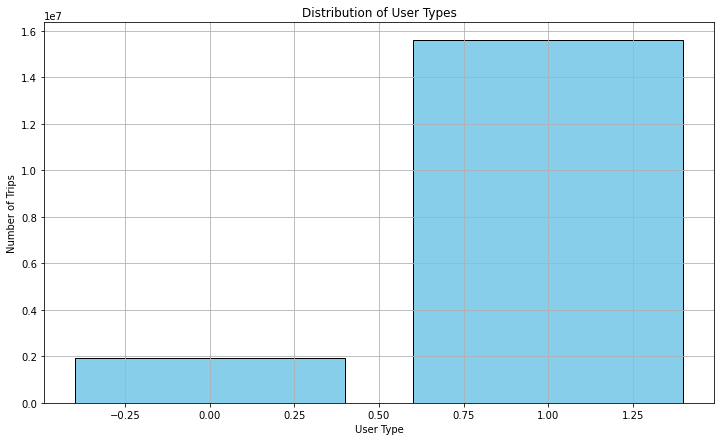

In [22]:
# Distribution of User Types
plt.figure(figsize=(12, 7))
usertype_counts = df['usertype'].value_counts()
plt.bar(usertype_counts.index, usertype_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# 2. Prediction Challenge

## Clustering

The analysis begins with the Elbow method to determine the optimal number of clusters for k-means clustering.


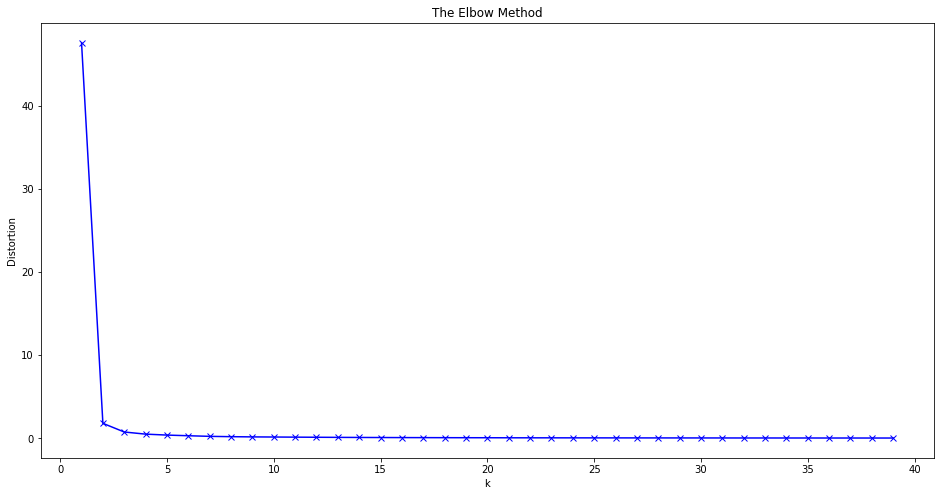

In [23]:
distortions = []

stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

K = range(1, 40) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stations[['start_station_latitude', 'start_station_longitude']])
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [24]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude
0,72,40.767272,-73.993929
1324,79,40.719116,-74.006667
2430,82,40.711174,-74.000165
2866,83,40.683826,-73.976323
3551,119,40.696089,-73.978034


Although fewer than five clusters seemed optimal, the project required more than 20. Hence, we settled on 20 clusters, as a larger number offered no analytical advantage.

Upon examining the coordinates, we found that two stations in the cluster are located in Montreal, Canada. These will be excluded to maintain focus on the New York stations in our analysis.

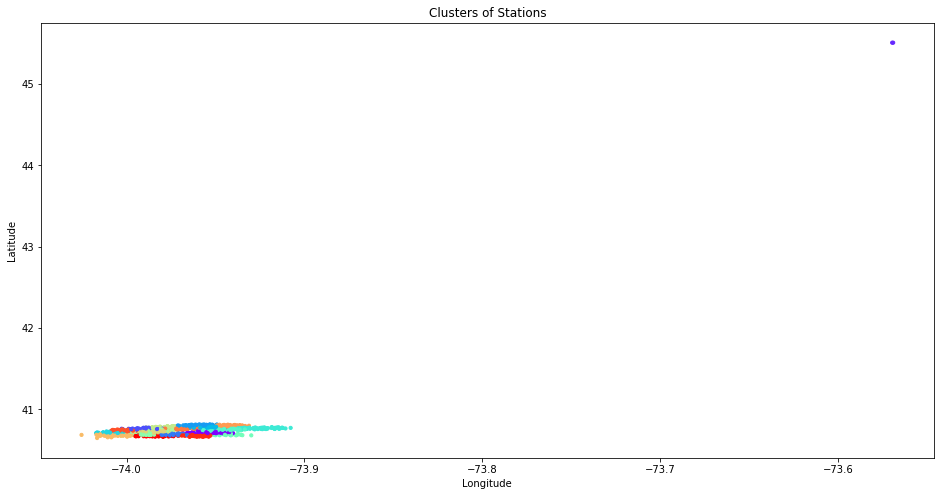

In [25]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['cluster'] = kmeans.labels_

plt.figure(figsize=(16, 8))  
plt.scatter(stations['start_station_longitude'], stations['start_station_latitude'],
            c=stations['cluster'], cmap='rainbow', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.show()


In [26]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

        start_station_id  start_station_latitude  start_station_longitude  \
676612              3488               45.506364               -73.569463   
714486              3650               45.506264               -73.568906   

        cluster  
676612        1  
714486        1  


The bar chart shows a uniform distribution of stations across clusters, suggesting a well-distributed set of clustersexcept for cluster number 1, which includes stations located in Canada.

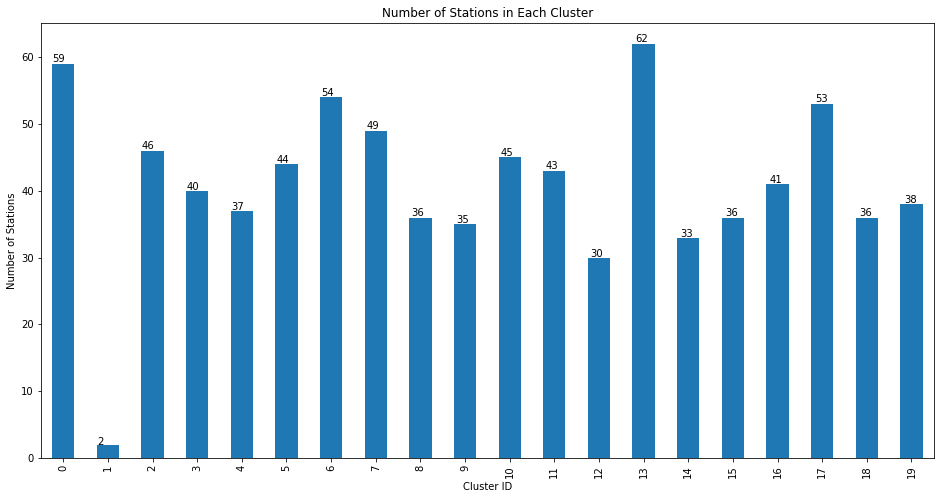

In [27]:
cluster_counts = stations.groupby('cluster').size()

ax = cluster_counts.plot(kind='bar', figsize=(16,8))
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.title('Number of Stations in Each Cluster')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [28]:
# Keep only the stations that are not in cluster 1
stations = stations[stations['cluster'] != 1]

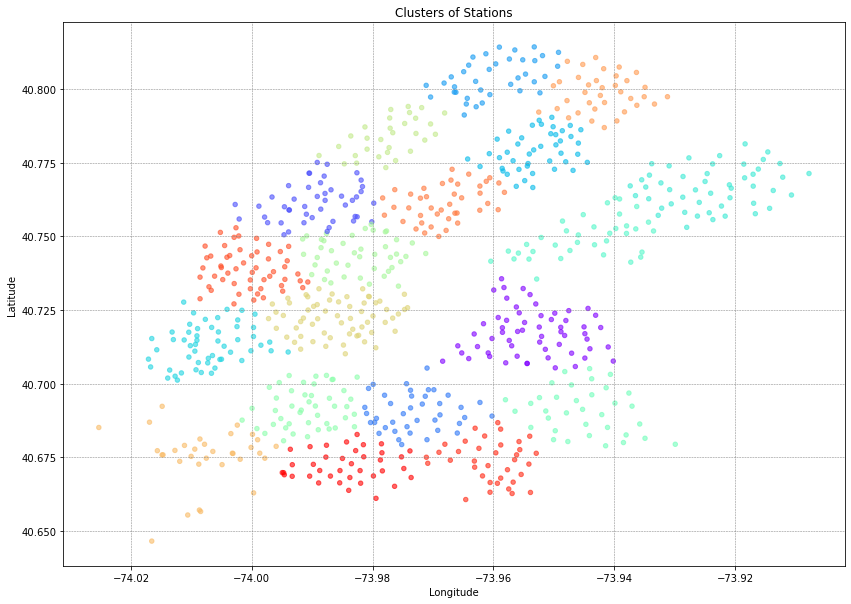

In [29]:
plt.figure(figsize=(14, 10))  
ax = plt.axes()  
ax.set_facecolor('white')
plt.scatter(
    stations['start_station_longitude'], 
    stations['start_station_latitude'], 
    c=stations['cluster'], 
    cmap='rainbow', 
    s=20,  
    alpha=0.6
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')  
plt.show()

The scatter plot reveals New York's geography, notably Manhattan, identifiable by a white square area with no stations in the plot's center, representing Central Park.

In [30]:
# Depiction of the stations in an actual interactive map

num_clusters = stations['cluster'].nunique()

colors = sns.color_palette("husl", num_clusters)  
color_palette = {cluster: colors[i] for i, cluster in enumerate(stations['cluster'].unique())}

colors = sns.color_palette("husl", num_clusters)  
color_palette = {cluster: colors[i] for i, cluster in enumerate(stations['cluster'].unique())}

# Create a base map
m = folium.Map(location=[stations['start_station_latitude'].mean(), stations['start_station_longitude'].mean()], zoom_start=13)

# Add markers for each station, color-coded by their cluster
for index, row in stations.iterrows():
    cluster_color = color_palette[row['cluster']]
    folium.CircleMarker(
        location=(row['start_station_latitude'], row['start_station_longitude']),
        radius=5,
        color=mcolors.rgb2hex(cluster_color),  # Convert RGB to hex format
        popup=f"ID: {row['start_station_id']}<br>Cluster: {row['cluster']}",
        fill=True,
        fill_color=mcolors.rgb2hex(cluster_color)
    ).add_to(m)

m

The the coordinates are plotted again using an interactive map from the `Folium` where you can zoom and check the stations locations in the areas of New York

Note: Run the preceding code cells to display this map.

In [31]:
# Add an extra column to the dataframe with the cluster ID
merged_df = df.merge(stations[['start_station_id', 'cluster']], on='start_station_id', how='left')

Below we are determining the cluster with the lighest demand in terms of departures.


In [32]:
# Calculate total demand (arrivals) for each cluster
cluster_demand = merged_df.groupby('cluster').size()

# Find the cluster with the highest demand
cluster_highest_demand = cluster_demand.idxmax()

# Create a new DataFrame with data points only from the cluster with the highest demand
df_onecluster = merged_df[merged_df['cluster'] == cluster_highest_demand]

df_onecluster['cluster'].unique()
df_onecluster.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
4181,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127,40.731724,-74.006744,382,40.734927,-73.992005,25514,1,1979,2,17.0
4182,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127,40.731724,-74.006744,530,40.771522,-73.990541,30370,1,1969,1,17.0
4183,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127,40.731724,-74.006744,3255,40.750585,-73.994685,25036,1,1966,1,17.0
4184,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127,40.731724,-74.006744,229,40.727434,-73.993790,33019,1,1992,1,17.0
4185,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127,40.731724,-74.006744,229,40.727434,-73.993790,27221,1,1991,2,17.0


We find that Cluster 17 which includes 53 stations is the class with the highest demand in our case.


## Prediction - Regression

Data is transformed to align with machine learning requirements, enabling hourly estimation of pickups and dropoffs for each cluster.

In [33]:
merged_df['start_hour'] = merged_df['starttime'].dt.strftime('%Y-%m-%d %H:00:00')
merged_df['stop_hour'] = merged_df['stoptime'].dt.strftime('%Y-%m-%d %H:00:00')

pickups = merged_df.groupby(['start_hour', 'cluster']).size().reset_index(name='pickups')
dropoffs = merged_df.groupby(['stop_hour', 'cluster']).size().reset_index(name='dropoffs')

pickups = pickups.rename(columns={"start_hour": "hour"})
dropoffs = dropoffs.rename(columns={"stop_hour": "hour"})

hourly_df = pd.merge(pickups, dropoffs, on=['hour', 'cluster'], how='outer').fillna(0)
hourly_df['cluster'] = hourly_df['cluster'].astype(int)
hourly_df['pickups'] = hourly_df['pickups'].astype(int)
hourly_df['dropoffs'] = hourly_df['dropoffs'].astype(int)

In [34]:
hourly_df.head()

,hour,cluster,pickups,dropoffs
0,2018-01-01 00:00:00,0,9,6
1,2018-01-01 00:00:00,2,14,8
2,2018-01-01 00:00:00,3,2,2
3,2018-01-01 00:00:00,4,3,3
4,2018-01-01 00:00:00,5,7,7


### Feature Engineering

Here we focus on engineering features that are likely to be predictors of the bike-sharing demand. First, we convert the 'hour' column to a `datetime` object so that we can extract time components. We then create several new columns:

- `hour_of_day`: Represents the hour within a day, which might capture demand patterns related to daily activities.
- `day_of_week`: Indicates the day within the week.
- `month`: Shows the month of the year, which may show seasonal trends.
- `weekend`: A binary feature that indicates weekends.


In [35]:
hourly_df['hour'] = pd.to_datetime(hourly_df['hour'])

# Extracting time-related features from the 'hour' column
hourly_df['hour_of_day'] = hourly_df['hour'].dt.hour
hourly_df['day_of_week'] = hourly_df['hour'].dt.dayofweek
hourly_df['month'] = hourly_df['hour'].dt.month
hourly_df['weekend'] = hourly_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


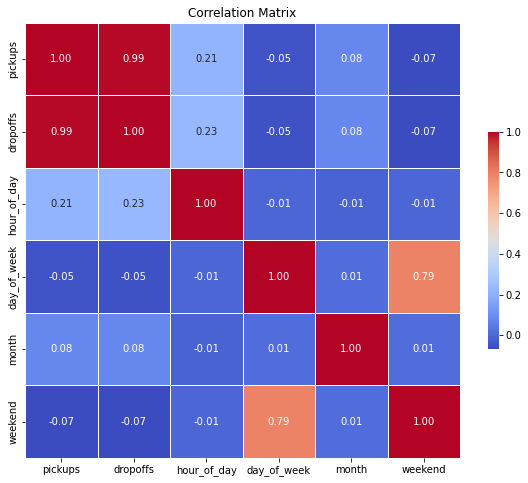

In [36]:
corre = hourly_df.drop(['hour', 'cluster'], axis=1)

corr_matrix = corre.corr()

plt.figure(figsize=(10, 8))


sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')

plt.show()

In [37]:
hourly_df = hourly_df.drop(['day_of_week', 'month', 'weekend'], axis=1)

From the correlation table we can say that `hour_of_day` has the most significant correlation value with pickups and dropoffs, while the other features have low correlation values and that's why we will not keep them.

In [38]:
# Create lagged features
for lag_days in [1, 2, 3, 4]:  # same hour from 1, 2, 3, 4 days ago
    lag_hours = lag_days * 24
    hourly_df[f'lag_pickups_day_{lag_days}'] = hourly_df['pickups'].shift(lag_hours)
    hourly_df[f'lag_dropoffs_day_{lag_days}'] = hourly_df['dropoffs'].shift(lag_hours)

# Drop rows with NaN values created by lag features
hourly_df = hourly_df.dropna()

train_df = hourly_df[hourly_df['hour'].dt.month <= 10]
test_df = hourly_df[hourly_df['hour'].dt.month > 10]

X_train = train_df.drop(['hour', 'pickups', 'dropoffs'], axis=1)
y_train = train_df[['pickups', 'dropoffs']]

X_test = test_df.drop(['hour', 'pickups', 'dropoffs'], axis=1)
y_test = test_df[['pickups', 'dropoffs']]


Additionally, we created lagged features based on the assumption that bike-sharing demand is not only influenced by current conditions but also by its recent history. We create lagged features for pickups and dropoffs for the past 1, 2, 3 and 4 days. This approach is expected to capture short-term temporal dependencies.

We remove any rows with NaN values, which occured from the lagging process.

The response `y` of the models we are going to create is a 2-dimensional vector which consists of the number of pickups and the numbers dropoffs. So for our predictions we use a single model that estimates both pickups and dropoffs at the same time. Also the variable `cluster` is passed as a feature in the predictors `X` so a sinlge model is able to predict demand for all the clusters at once.

Lastly, we split our data into training and test sets based on the month, with the training set including data up to October and the test set comprising data from November and December. This temporal split is definining the evaluation of the model's performance on unseen data and simulates a real-world prediction scenario.


### Model Training and Evaluation
With our features prepared, we now move on to training and evaluating our machine learning models. We have chosen a selection of models to train: Gradient Boosting with XGBoost, Decision Tree, Neural Network with an MLPRegressor, and Random Forest. These models were selected for their different approaches to regression problems and their ability to capture non-linear relationships in the data. We tried Support Vector Machine and Linear Regression but they did not perform well as they are not good for capturing non-linearities.

For each model, we:
- Train the model on the training dataset, which includes data from January to October.
- Predict bike-sharing demand (pickups and dropoffs) on the test dataset, which includes data from November and December.
- Calculate the root mean squared error (RMSE) to quantify the prediction error.
- Determine the coefficient of determination (R2 score) to assess the model's explanatory power.



In [39]:
# Initialize models
models = {
    'Gradient Boosting (XGBoost)': xgb.XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500),
    'Random Forest': RandomForestRegressor(n_estimators=100),
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - RMSE: {rmse}')
    print(f'{model_name} - R2 Score: {r2}')
    print('-' * 40)


Training and evaluating Gradient Boosting (XGBoost)...
Gradient Boosting (XGBoost) - RMSE: 43.85591230737557
Gradient Boosting (XGBoost) - R2 Score: 0.8785786661901607
----------------------------------------
Training and evaluating Decision Tree...
Decision Tree - RMSE: 55.20970310290641
Decision Tree - R2 Score: 0.8075704447926741
----------------------------------------
Training and evaluating Neural Network (MLP)...
Neural Network (MLP) - RMSE: 54.831659212451285
Neural Network (MLP) - R2 Score: 0.8101708257046575
----------------------------------------
Training and evaluating Random Forest...
Random Forest - RMSE: 39.50499216029554
Random Forest - R2 Score: 0.9014734488039319
----------------------------------------


In the comparative analysis of machine learning models, the **Random Forest** model exhibits superior predictive accuracy with the lowest Root Mean Squared Error (RMSE) of about 39.59 and an R-squared (R2) value of 0.901, suggesting it explains 90.1% of the variance in the test dataset. This highlights its robustness in modeling the data compared to the other models, with Gradient Boosting following closely behind. The Neural Network and Decision Tree models have higher RMSEs and lower R2 scores, indicating they may not be as effective in capturing the data's underlying patterns. Therefore, we are going to use Random Forest for Task 3 as the prediction model.

Extracting the data for a specific day (7 November 2018) for cluster 17 to feed them to our prediction model and get the predictions of the bike-sharing demand for the next day (8 November 2018).

In [40]:
cluster_id = 17
specific_day = '2018-11-07'
specific_test_data1 = test_df[(test_df['cluster'] == cluster_id ) & 
                             (test_df['hour'].dt.date == pd.to_datetime(specific_day).date())]


In [41]:
specific_test_data1

,hour,cluster,pickups,dropoffs,hour_of_day,lag_pickups_day_1,lag_dropoffs_day_1,lag_pickups_day_2,lag_dropoffs_day_2,lag_pickups_day_3,lag_dropoffs_day_3,lag_pickups_day_4,lag_dropoffs_day_4
136496,2018-11-07 00:00:00,17,63,70,0,28.0,31.0,17.0,18.0,192.0,200.0,273.0,318.0
136515,2018-11-07 01:00:00,17,18,27,1,12.0,16.0,13.0,14.0,149.0,166.0,141.0,160.0
136531,2018-11-07 02:00:00,17,23,18,2,4.0,4.0,11.0,14.0,22.0,18.0,256.0,252.0
136545,2018-11-07 03:00:00,17,7,13,3,4.0,5.0,8.0,13.0,118.0,132.0,16.0,16.0
136562,2018-11-07 04:00:00,17,13,9,4,3.0,4.0,7.0,7.0,38.0,45.0,65.0,69.0
136579,2018-11-07 05:00:00,17,55,49,5,1.0,1.0,23.0,18.0,4.0,4.0,11.0,14.0
136598,2018-11-07 06:00:00,17,237,195,6,30.0,24.0,3.0,2.0,13.0,11.0,6.0,4.0
136617,2018-11-07 07:00:00,17,476,428,7,106.0,83.0,14.0,10.0,7.0,13.0,4.0,5.0
136636,2018-11-07 08:00:00,17,749,698,8,303.0,241.0,29.0,27.0,92.0,74.0,4.0,6.0
136655,2018-11-07 09:00:00,17,647,714,9,442.0,436.0,54.0,50.0,341.0,305.0,1.0,1.0


In [42]:
cluster_id = 17
specific_day = '2018-11-08'
specific_test_data2 = test_df[(test_df['cluster'] == cluster_id ) & 
                             (test_df['hour'].dt.date == pd.to_datetime(specific_day).date())]

y_actual = specific_test_data2[['pickups', 'dropoffs']]


We extracted also the data of the next day (8 November), so we can compare them with the predictions for that day and have overview.

In [43]:
X_specific = specific_test_data1.drop(['hour', 'pickups', 'dropoffs'], axis=1)
predictions = model.predict(X_specific)

In [44]:
print(predictions)

[[ 71.68  80.51]
 [ 35.52  40.58]
 [ 14.41  15.9 ]
 [ 16.48  18.44]
 [ 15.63  16.02]
 [ 23.45  20.91]
 [174.14 151.2 ]
 [407.61 362.5 ]
 [739.45 673.75]
 [619.6  680.65]
 [371.57 384.42]
 [401.3  396.53]
 [492.96 485.58]
 [519.87 518.09]
 [473.6  473.23]
 [469.37 460.28]
 [705.58 665.75]
 [758.72 714.99]
 [856.41 826.42]
 [534.36 582.26]
 [400.83 423.1 ]
 [339.38 358.15]
 [258.97 278.07]
 [130.41 143.74]]


In [45]:
print(y_actual)

        pickups  dropoffs
136940       55        67
136958       36        46
136974       17        15
136991        6        10
137007       17        12
137026       62        53
137045      210       184
137064      435       370
137083      767       726
137102      627       694
137121      375       387
137140      403       375
137159      450       468
137178      427       437
137197      434       416
137216      530       497
137235      607       583
137254      832       822
137273      884       900
137292      604       640
137311      425       444
137330      296       319
137349      243       255
137368      158       180


## Required Bikes for every day of every cluster

The purpose of Task 3 is to optimize the distribution of bikes across the network for the upcoming day. For that purpose, we have developed a function below (`predict_bike_requirements`). This function ensures that the predicted demand for bike pickups and dropoffs at each cluster of stations is met without shortages.

The `predict_bike_requirements` function is designed to take in a specific date, the test dataset, and the trained model as arguments. The function performs the following steps:

1. **Feature Preparation**: Next, the function prepares the features required by the model for prediction by dropping non-essential columns like 'hour', 'pickups', and 'dropoffs'.

2. **Model Prediction**: With the features ready, it invokes the prediction method of the provided model to forecast bike demand (both pickups and dropoffs) for the next 24 hours.

3. **Cumulative Difference Calculation**: The function computes the cumulative difference between predicted pickups and dropoffs for each cluster. This step shows the net number of bikes that will be required at each station over time.

4. **Maximum Bikes Required**: The maximum number of bikes needed for each cluster is then calcualted. This number is the maximum cumulative deficit of bikes throughout the day and shows the total number of bikes that need to be repositioned to each cluster to ensure availability.


In [46]:
def predict_bike_requirements(specific_day, test_df, model):
    X_24hours = test_df[test_df['hour'].dt.date == pd.to_datetime(specific_day).date()]
    X_24hours_features = X_24hours.drop(['hour', 'pickups', 'dropoffs'], axis=1)

    predicted_values = model.predict(X_24hours_features)

    # Create a DataFrame for predicted values and ensure correct 'cluster' values are used
    predicted_df = pd.DataFrame(predicted_values, columns=['predicted_pickups', 'predicted_dropoffs'])
    predicted_df['cluster'] = X_24hours['cluster'].values

    # Calculate cumulative differences
    cumulative_diff = {}
    for cluster in predicted_df['cluster'].unique():
        cluster_data = predicted_df[predicted_df['cluster'] == cluster].copy()
        cluster_data.loc[:, 'cumulative_diff'] = cluster_data['predicted_pickups'].cumsum() - cluster_data['predicted_dropoffs'].cumsum()
        cumulative_diff[cluster] = cluster_data

    # Calculate the maximum bikes required for each cluster
    max_bikes_required = {cluster: data['cumulative_diff'].max() for cluster, data in cumulative_diff.items()}

    print("Maximum Bikes Required Per Cluster on", specific_day)
    print("---------------------------------------")
    for cluster, max_bikes in max_bikes_required.items():
        rounded_max_bikes = math.ceil(max_bikes)  # Round up to the nearest whole number
        print(f"Cluster {cluster}: {rounded_max_bikes} bikes")


In [47]:
specific_day = '2018-11-08'

predict_bike_requirements(specific_day, test_df, model)

Maximum Bikes Required Per Cluster on 2018-11-08
---------------------------------------
Cluster 0: 34 bikes
Cluster 2: 216 bikes
Cluster 3: 39 bikes
Cluster 4: 58 bikes
Cluster 5: 34 bikes
Cluster 6: 315 bikes
Cluster 7: 14 bikes
Cluster 8: 21 bikes
Cluster 9: 23 bikes
Cluster 10: 49 bikes
Cluster 11: 213 bikes
Cluster 12: 71 bikes
Cluster 13: 149 bikes
Cluster 14: 17 bikes
Cluster 15: 17 bikes
Cluster 16: 204 bikes
Cluster 17: 225 bikes
Cluster 18: 28 bikes
Cluster 19: 24 bikes


# 3. Exploratory Component

In line with the project's exploratory objectives and to further enhance our analytical framework, we expanded our dataset by incorporating weather data for the year 2018. This extension is based on the logic that weather conditions have an important impact on bike rental patterns. We considered integrating temperature, precipitation, wind speed, and other meteorological parameters,to see at what extent which weather variables correlate with bike rental frequency and our findings follow below. 

We extracted the weather data of New York in the area of Manhattan by accessing the Weathertack API. 

With the function below the weather data is extracted and stored in a CSV file.

In [48]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_weather_data(api_key, location, date):
    """
    Fetch daily historical weather data from Weatherstack API.
    """
    base_url = "http://api.weatherstack.com/historical"
    params = {
        'access_key': api_key,
        'query': location,
        'historical_date': date.strftime('%Y-%m-%d'),
        'hourly': 1
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

api_key = 'a6a684b0056452130c0c5a93008030d4'
location = 'New York'
start_date = datetime(2018, 1, 1)
end_date = datetime(2018, 12, 31)

weather_data_list = []

# Loop over each day in 2018
current_date = start_date
while current_date <= end_date:
    daily_data = fetch_weather_data(api_key, location, current_date)
    weather_data_list.append(daily_data)
    current_date += timedelta(days=1)

weather_data_df = pd.DataFrame(weather_data_list)

weather_data_df.to_csv('weather_data_2018.csv', index=False)

print("Weather data fetched and saved.")


Weather data fetched and saved.


In [49]:
weather_data_df = pd.read_csv('weather_data_2018.csv')

We import the data we have extracted through the API and perform some transformations to keep only the historical data dictonaries.

In [50]:
import ast  

weather_data_df = pd.read_csv('weather_data_2018.csv')

flattened_data = []

# Loop through each row in the dataframe
for index, row in weather_data_df.iterrows():
    try:       
        historical_data_dict = ast.literal_eval(row['historical'])
        for date, data in historical_data_dict.items():
            data['date'] = date 
            flattened_data.append(data)

    except ValueError as e:
        print(f"Error processing row {index}: {e}")
        print("Problematic data:", row['historical'])

flattened_weather_df = pd.DataFrame(flattened_data)
flattened_weather_df.head()


,date,date_epoch,astro,mintemp,maxtemp,avgtemp,totalsnow,sunhour,uv_index,hourly
0,2018-01-01,1514764800,"{'sunrise': '07:20 AM', 'sunset': '04:39 PM', ...",-13,-7,-10,0.0,8.7,2,"[{'time': '0', 'temperature': -11, 'wind_speed..."
1,2018-01-02,1514851200,"{'sunrise': '07:20 AM', 'sunset': '04:40 PM', ...",-10,-4,-7,0.0,8.7,2,"[{'time': '0', 'temperature': -9, 'wind_speed'..."
2,2018-01-03,1514937600,"{'sunrise': '07:20 AM', 'sunset': '04:41 PM', ...",-9,-2,-6,0.0,8.7,2,"[{'time': '0', 'temperature': -8, 'wind_speed'..."
3,2018-01-04,1515024000,"{'sunrise': '07:21 AM', 'sunset': '04:42 PM', ...",-8,-3,-4,6.1,3.5,1,"[{'time': '0', 'temperature': -4, 'wind_speed'..."
4,2018-01-05,1515110400,"{'sunrise': '07:20 AM', 'sunset': '04:43 PM', ...",-13,-9,-12,0.0,8.7,2,"[{'time': '0', 'temperature': -9, 'wind_speed'..."


Then, we perfom some additional data transformation to the `hourly` column where all the hourly weather data for each day is stored and shape the dataframe to a form that is similar to our initial input dataframe that is fed to the prediction model so that we are able to merge them.

The meteorogical parameters we chose to keep and examine further whether they are useful as predictors are `temperature`, `precip`, `wind_speed`, `visibility`, `cloudcover`, `humidity` and `windchill`.

In [51]:
expanded_hourly_data = []

for index, row in flattened_weather_df.iterrows():
    hourly_list = row['hourly']

    for hourly_data in hourly_list:
        hourly_data['hour'] = pd.to_datetime(row['date'] + ' ' + hourly_data['time'].zfill(4), format='%Y-%m-%d %H%M')
        expanded_hourly_data.append(hourly_data)

hourly_weather_df = pd.DataFrame(expanded_hourly_data)

selected_columns = {
    'hour': 'hour',
    'temperature': 'temp',
    'precip': 'precip',
    'wind_speed': 'wind_speed',
    'visibility': 'visibility',
    'cloudcover': 'cloudcover',
    'humidity': 'humidity',
    'windchill': 'windchill',
}
hourly_weather_df = hourly_weather_df[selected_columns.keys()].rename(columns=selected_columns)

hourly_weather_df.head()

,hour,temp,precip,wind_speed,visibility,cloudcover,humidity,windchill
0,2018-01-01 00:00:00,-11,0.0,20,10,5,67,-19
1,2018-01-01 03:00:00,-13,0.0,19,10,3,66,-21
2,2018-01-01 06:00:00,-13,0.0,17,10,11,66,-20
3,2018-01-01 09:00:00,-12,0.0,19,10,4,62,-20
4,2018-01-01 12:00:00,-9,0.0,24,10,19,55,-17


It is observed that the data retrieved from the API shows observations recorded at three-hour intervals. To ensure consistency and to be able to merge this weather dataframe with our initial dataframe we have created a function below that fills in the 2 missing  hours between these three-hour intervals with the value of the hour in the beginning of each interval.

In [52]:
def fill_missing_hours(df):
    # Find the minimum and maximum time in the dataset
    start_time = df['hour'].min()
    end_time = df['hour'].max()

    # Generate a complete range of hourly timestamps between start and end time
    all_hours = pd.date_range(start=start_time, end=end_time, freq='H')

    # Reindex the DataFrame to include all hours, filling missing values with the previous ones
    df = df.set_index('hour').reindex(all_hours, method='ffill').reset_index()
    df = df.rename(columns={'index': 'hour'})
    
    return df

weather_df = fill_missing_hours(hourly_weather_df)

weather_df.head()


,hour,temp,precip,wind_speed,visibility,cloudcover,humidity,windchill
0,2018-01-01 00:00:00,-11,0.0,20,10,5,67,-19
1,2018-01-01 01:00:00,-11,0.0,20,10,5,67,-19
2,2018-01-01 02:00:00,-11,0.0,20,10,5,67,-19
3,2018-01-01 03:00:00,-13,0.0,19,10,3,66,-21
4,2018-01-01 04:00:00,-13,0.0,19,10,3,66,-21


In [53]:
hourly_df = pd.DataFrame(hourly_df)
weather_df = pd.DataFrame(weather_df)

hourly_df['hour'] = pd.to_datetime(hourly_df['hour'])
weather_df['hour'] = pd.to_datetime(weather_df['hour'])

merged = pd.merge(hourly_df, weather_df, on='hour', how='inner')
merged.head()

,hour,cluster,pickups,dropoffs,hour_of_day,lag_pickups_day_1,lag_dropoffs_day_1,lag_pickups_day_2,lag_dropoffs_day_2,lag_pickups_day_3,lag_dropoffs_day_3,lag_pickups_day_4,lag_dropoffs_day_4,temp,precip,wind_speed,visibility,cloudcover,humidity,windchill
0,2018-01-01 06:00:00,2,4,4,6,2.0,2.0,17.0,22.0,2.0,3.0,9.0,6.0,-13,0.0,17,10,11,66,-20
1,2018-01-01 06:00:00,3,2,2,6,1.0,1.0,6.0,6.0,2.0,2.0,14.0,8.0,-13,0.0,17,10,11,66,-20
2,2018-01-01 06:00:00,5,3,2,6,1.0,1.0,13.0,11.0,4.0,4.0,2.0,2.0,-13,0.0,17,10,11,66,-20
3,2018-01-01 06:00:00,6,2,3,6,1.0,1.0,4.0,4.0,18.0,16.0,3.0,3.0,-13,0.0,17,10,11,66,-20
4,2018-01-01 06:00:00,11,9,7,6,1.0,2.0,1.0,1.0,10.0,8.0,7.0,7.0,-13,0.0,17,10,11,66,-20


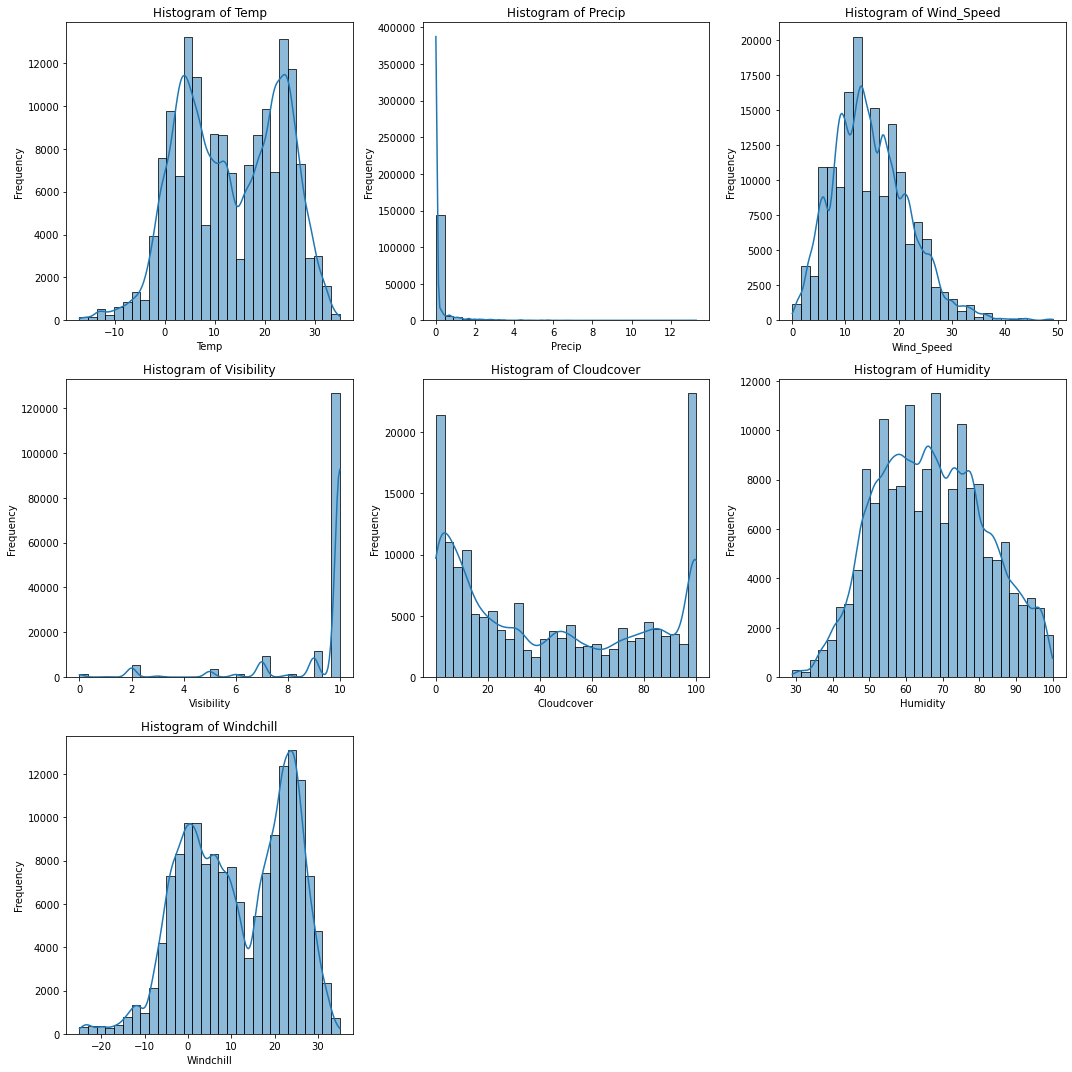

In [54]:
weather_variables = ['temp', 'precip', 'wind_speed', 'visibility', 'cloudcover', 'humidity', 'windchill']

num_vars = len(weather_variables)
cols = 3  
rows = num_vars // cols + (num_vars % cols > 0)

plt.figure(figsize=(15, 5 * rows))

for i, var in enumerate(weather_variables, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(merged[var], bins=30, kde=True)
    plt.title(f'Histogram of {var.title()}')
    plt.xlabel(var.title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms indicate that temperature, windchill, and humidity tend to follow a normal distribution, while precipitation, wind speed, and visibility are skewed towards lower values. Cloud cover displays a uniform distribution, not favoring any specific range. These patterns suggest typical weather behavior influenced by regional and seasonal factors.

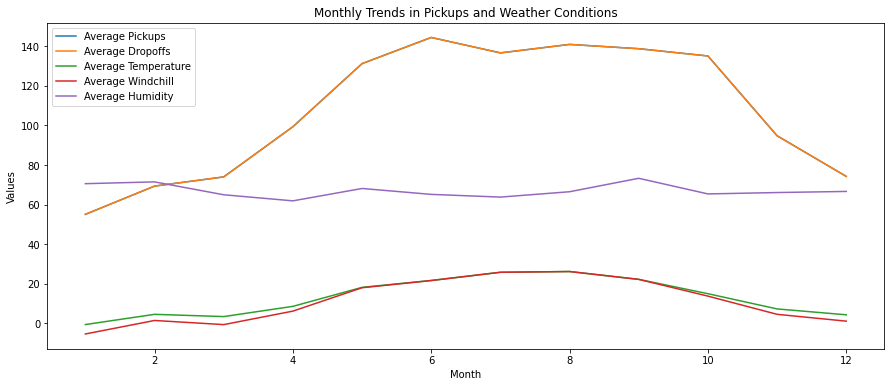

In [55]:
merged['month'] = merged['hour'].dt.month

# Grouping data by month
monthly_data = merged.groupby('month').mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_data['pickups'], label='Average Pickups')
plt.plot(monthly_data['dropoffs'], label='Average Dropoffs')
plt.plot(monthly_data['temp'], label='Average Temperature')
plt.plot(monthly_data['windchill'], label='Average Windchill')
plt.plot(monthly_data['humidity'], label='Average Humidity')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Trends in Pickups and Weather Conditions')
plt.legend()
plt.show()

merged = merged.drop(['month'], axis=1)

The line chart suggests that transportation activity, with both pickups and dropoffs, peaks during warmer months, while windchill and temperature seem to follow the trends of the bike demand. Humidity shows little variation and seems to have a negligible effect on transportation patterns.

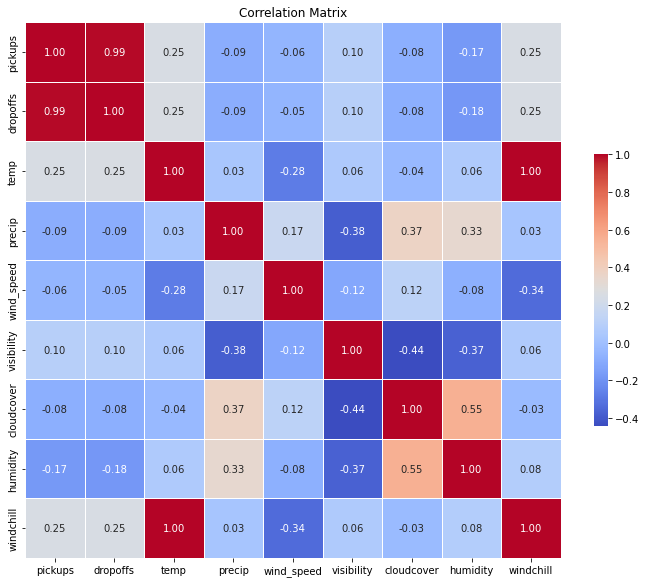

In [56]:
corr_df = merged.drop(['hour', 'cluster', 'lag_pickups_day_1', 'lag_dropoffs_day_1', 'lag_pickups_day_2', 'lag_dropoffs_day_2' ,'lag_pickups_day_3', 'lag_dropoffs_day_3','hour_of_day' ,'lag_pickups_day_4', 'lag_dropoffs_day_4'], axis=1)

corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 10))


sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')

plt.show()

From the correlation table above it can be observed that the weather variables that more correlated to pickups and dropoffs are `temperature`, `humidity` and `windchill` with absolute correlation values of `0.25`, `0.25` and `0.18` respectively. We can see that `temperature` and `windchill` are correlated 100\%, so that means that they explain the same variation in the data.  Therefore, we can keep one of the two for further analysis. We consider further only temperature and humidity. Although these correlations range from moderate to weak, it is still worthwhile to explore their potential impact on enhancing the performance of our selected models during training.

In [57]:
merged = merged.drop(['precip', 'wind_speed', 'visibility', 'cloudcover', 'windchill'], axis=1)

train_df = merged[merged['hour'].dt.month <= 10]
test_df = merged[merged['hour'].dt.month > 10]

X_train = train_df.drop(['hour', 'pickups', 'dropoffs'], axis=1)
y_train = train_df[['pickups', 'dropoffs']]

X_test = test_df.drop(['hour', 'pickups', 'dropoffs'], axis=1)
y_test = test_df[['pickups', 'dropoffs']]

In [58]:
# Initialize models
models = {
    'Gradient Boosting (XGBoost)': xgb.XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500),
    'Random Forest': RandomForestRegressor(n_estimators=100),
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - RMSE: {rmse}')
    print(f'{model_name} - R2 Score: {r2}')
    print('-' * 60)


Training and evaluating Gradient Boosting (XGBoost)...
Gradient Boosting (XGBoost) - RMSE: 39.9492286611172
Gradient Boosting (XGBoost) - R2 Score: 0.8992914587007206
------------------------------------------------------------
Training and evaluating Decision Tree...
Decision Tree - RMSE: 48.63715223016115
Decision Tree - R2 Score: 0.850768382836719
------------------------------------------------------------
Training and evaluating Neural Network (MLP)...
Neural Network (MLP) - RMSE: 51.16127506916378
Neural Network (MLP) - R2 Score: 0.8348486675808127
------------------------------------------------------------
Training and evaluating Random Forest...
Random Forest - RMSE: 33.687147344251606
Random Forest - R2 Score: 0.9284038894218386
------------------------------------------------------------


We can observe that the integration of weather data in the predictive models has led to a consistent small improvement with an increase of at least 0.03 in terms of $R^2$ across all models. An increase in the $R^2$ value, even if it's as small as 0.03, after integrating weather data into our machine learning prediction models indicates that weather does have some influence on the outcome we are trying to predict.

Since the weather data is for every three hours and predictions are hourly, this mismatch might not capture the whole impact of weather changes. Using hourly weather data (which we couldnt access free) or considering other factors could give better results. In essence, weather is important, but other elements also play a role in bike station usage.

# 4. Conclusions 

In our project, we successfully applied the Random Forest model, which emerged as a top performer among various 
machine learning algorithms for predicting the demand in bike-sharing services. Its high accuracy and low error margin 
were key in ensuring that bikes were distributed efficiently to meet user demand. 

The incorporation of weather data into our analysis, despite being limited to three-hour intervals, slightly improved 
our predictions. This highlights the important role that weather plays in bike-sharing usage patterns. More detailed 
weather data could potentially make our predictions even sharper. 

Overall, the project demonstrates the value of data-driven methods in enhancing the operations of bike-sharing systems.
Our work is a step towards smarter, more responsive urban transportation services. By integrating real-time data and 
other relevant factors in the future, we can refine our approach, making bike-sharing even more convenient and 
user-friendly. This project illustrates the practical benefits of data science in advancing sustainable urban 
transport.